# 1 Formulovanie Problému
### Cieľom práce je spracovať a transformovať dataset Spotify, aby sa vytvoril model predikcie. Tento model musí predpovedať, v ktorom z piatich top  typov žánrou bude pravdepodobne patriť každý žáner čo najvyššou presnosťou.¶



# 2 Popis datasetu
### Dataset obsahuje údaje, ako obllubenosť skladieb, živosť hudby, žáner skladby atď. o 50 najobľúbenejších skladieb v Spotify

In [1]:
#importy
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# načitanie datasetu
column_names = ['ID','title','artist','top_genre','year','added','bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop','country']
df = pd.read_csv('top50contry.csv',names=column_names,header = 0,nrows=300)

In [3]:
# výpis prvých 10 prvkov z datasetu
df[:10]

,ID,title,artist,top_genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,country
0,1,Dance_Monkey,Tones_and_I,australian_pop,2019,1969-12-31,98,59,82,-6,15,51,209,69,9,100,world
1,2,ROXANNE,Arizona_Zervas,pop_rap,2019,1969-12-31,117,60,62,-6,46,46,164,5,15,99,world
2,3,Memories,Maroon_5,pop,2019,1969-12-31,91,32,76,-7,8,57,189,84,5,99,world
3,4,Circles,Post_Malone,dfw_rap,2019,1969-12-31,120,76,70,-3,9,55,215,19,4,99,world
4,5,All_I_Want_for_Christmas_Is_You,Mariah_Carey,dance_pop,1994,1969-12-31,150,63,34,-7,7,35,241,16,4,98,world
5,6,everything_i_wanted,Billie_Eilish,electropop,2019,1969-12-31,120,23,70,-14,11,24,245,90,10,98,world
6,7,Falling,Trevor_Daniel,alternative_r&b,2018,1969-12-31,127,43,78,-9,9,24,159,12,4,97,world
7,8,RITMO_(Bad_Boys_For_Life),The_Black_Eyed_Peas,dance_pop,2019,1969-12-31,105,72,72,-7,24,67,222,3,7,97,world
8,9,Don't_Start_Now,Dua_Lipa,dance_pop,2019,1969-12-31,124,79,79,-5,10,68,183,1,8,97,world
9,10,Tusa,KAROL_G,latin,2019,1969-12-31,101,72,80,-3,6,57,201,30,30,96,world


In [4]:
# Predátovanie prvkuv datasetu na číslo
df['bpm'] = pd.to_numeric(df['bpm'])
df['nrgy'] = pd.to_numeric(df['nrgy'])
df['dnce'] = pd.to_numeric(df['dnce'])
df['dB'] = pd.to_numeric(df['dB'])
df['live'] = pd.to_numeric(df['live'])
df['val'] = pd.to_numeric(df['val'])
df['dur'] = pd.to_numeric(df['dur'])
df['acous'] = pd.to_numeric(df['acous'])

In [5]:
#Popis numerických hodnôt datasetu
df.describe()

,ID,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,2005.210000,124.280000,60.536667,63.836667,-7.250000,18.593333,64.043333,208.500000,35.706667,8.036667,85.243333
std,86.746758,19.731625,31.072495,19.024241,17.034786,3.415609,16.156466,21.353564,59.550799,29.796421,7.588628,11.055838
min,1.000000,1942.000000,65.000000,11.000000,22.000000,-17.000000,4.000000,14.000000,117.000000,0.000000,3.000000,37.000000
25%,75.750000,1994.000000,98.000000,48.000000,53.000000,-9.000000,8.000000,47.000000,170.500000,10.750000,4.000000,83.000000
50%,150.500000,2018.000000,120.000000,65.000000,68.000000,-7.000000,11.000000,68.000000,204.000000,27.000000,5.000000,88.000000
75%,225.250000,2019.000000,147.000000,76.000000,76.000000,-5.000000,24.000000,82.000000,239.250000,61.000000,9.000000,92.000000
max,300.000000,2019.000000,202.000000,93.000000,93.000000,-1.000000,88.000000,98.000000,463.000000,96.000000,38.000000,100.000000


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


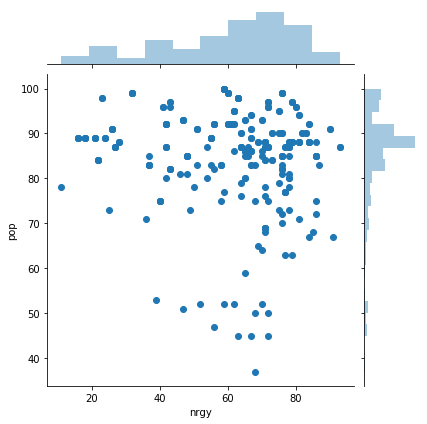

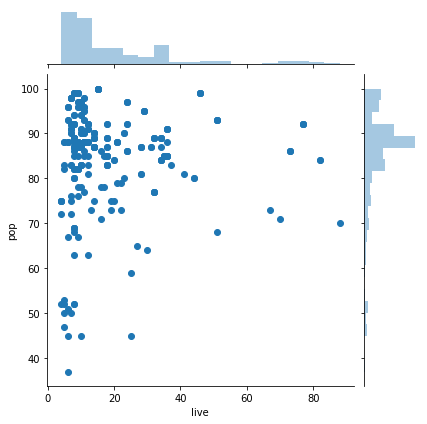

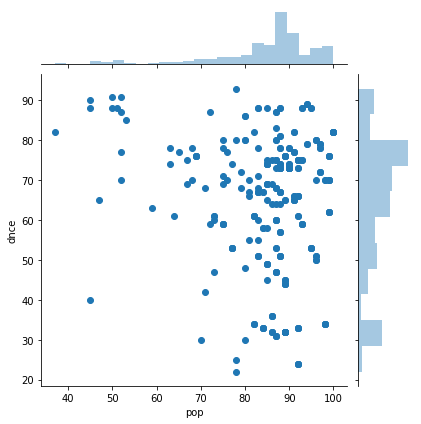

In [6]:
#Vzájomný vzťah medzi nrgy(Energia piesne) a pop(Popularitou)
sns.jointplot(df['nrgy'],df['pop'],data=df,kind='scatter')
#Vzájomný vzťah medzi live(Živosť piesni) a pop(Popularitou)
sns.jointplot(df['live'],df['pop'],data=df,kind='scatter')
#Vzájomný vzťah  pop(Popularitou) a medzi dnce(Schopnosť tancovať na danú pieseň)
sns.jointplot(df['pop'],df['dnce'],data=df,kind='scatter')

In [7]:
#Uloženie vsetkých žánrov do premennej zanre
zanre = df['top_genre']
from nltk.probability import FreqDist
frekvencia_zaner = FreqDist(zanre)
#Vypísanie najčastejších žánrov
frekvencia_zaner.most_common(5)

[('adult_standards', 71),
 ('latin', 46),
 ('dance_pop', 29),
 ('album_rock', 15),
 ('pop', 11)]

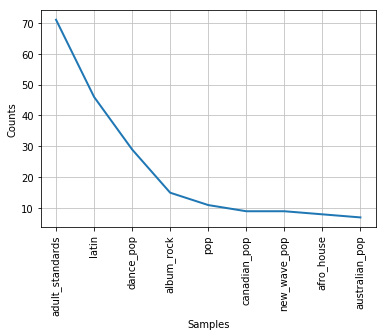

In [8]:
#Graf výskytu žánra v datasete
%matplotlib inline
frekvencia_zaner.plot(9, cumulative=False)

In [9]:
#Ďaľsia vizualizácia množiny údajov na zachytenie vzťahov medzi atribútmi a príslušnými triedami.
kategorie = ["adult_standards","latin",'dance_pop','album_rock','pop']
new_df = df[df['top_genre'].isin(kategorie)]
#sns.pairplot(new_df, hue="top_genre", height=3, diag_kind="kde")

# 3.1 Predspracovanie
### Pred predspracovaním dát musíme rozdeliť naše dáta na tréningové (80%) a na testovacie dáta (20%). Tréningové údaje (budú obsahovať triedy pre typy zánrov), na naučenie modelu, a testovacie údaje (obsahujú iba vlastnosti bez tried) na meranie presnosti  predikčného modelu.

In [10]:
from sklearn.model_selection import train_test_split

data = new_df
X = data[["pop","nrgy","live",'dnce','bpm','dB','val','dur','acous','spch']]
y = data["top_genre"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["top_genre"] = labelencoder.fit_transform(data["top_genre"])
type = pd.DataFrame({'top_genre': ["adult_standards","latin",'dance_pop','album_rock','pop']})

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [12]:
# Pridanie na koniec datasetu 5 nových numerických stĺpcov, ktoré budu spolu tvoriť trojrozmerný vektor
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
data = create_dummies(data,"top_genre")

In [13]:
data.head()

,ID,title,artist,top_genre,year,added,bpm,nrgy,dnce,dB,...,dur,acous,spch,pop,country,top_genre_0,top_genre_1,top_genre_2,top_genre_3,top_genre_4
2,3,Memories,Maroon_5,4,2019,1969-12-31,91,32,76,-7,...,189,84,5,99,world,0,0,0,0,1
4,5,All_I_Want_for_Christmas_Is_You,Mariah_Carey,2,1994,1969-12-31,150,63,34,-7,...,241,16,4,98,world,0,0,1,0,0
7,8,RITMO_(Bad_Boys_For_Life),The_Black_Eyed_Peas,2,2019,1969-12-31,105,72,72,-7,...,222,3,7,97,world,0,0,1,0,0
8,9,Don't_Start_Now,Dua_Lipa,2,2019,1969-12-31,124,79,79,-5,...,183,1,8,97,world,0,0,1,0,0
9,10,Tusa,KAROL_G,3,2019,1969-12-31,101,72,80,-3,...,201,30,30,96,world,0,0,0,1,0


# 3.2 Predspracovanie
### Druhou technikou predspracovania je škálovanie  údajov pomocou programu StandardScaler(), najmä preto, že MLP je citlivý na nenormalizované funkcie. To pomôže urýchliť algoritmus (gradientový zostup) a mať presnejší klasifikátor.

In [14]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Vlastnosti pred strednou normalizáciou
vlastnosti_pred = X_train

# Stredná normalizácia pre rýchlejší classifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Transformácia dát
X_train_array = sc.fit_transform(X_train.values)

# Priradíme škálované údaje do DataFrame a použijem argumenty indexu a stĺpcov, aby som zachoval svoje pôvodné indexy a názvy stĺpcov:
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)

# Vycentrované testovacie dáta na trénovacích dátach
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


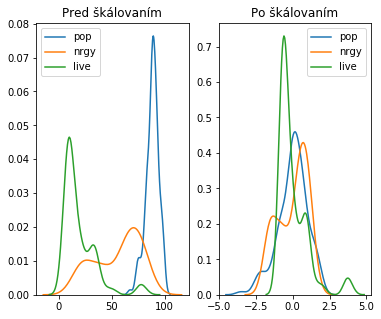

In [15]:
# Pred a po strednej normalizácií
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Pred škálovaním')
sns.kdeplot(vlastnosti_pred['pop'], ax=ax1)
sns.kdeplot(vlastnosti_pred["nrgy"], ax=ax1)
sns.kdeplot(vlastnosti_pred["live"], ax=ax1)


ax2.set_title('Po škálovaním')
sns.kdeplot(X_train['pop'], ax=ax2)
sns.kdeplot(X_train["nrgy"], ax=ax2)
sns.kdeplot(X_train["live"], ax=ax2)


plt.show()
#Hodnoty sú vlastností už sú teraz rozdelené podľa normálneho rozdelenia

### Podľa grafu zobrazému vyššie som zistil, aké funkcie škálovanie vykonal pre hodnoty údajov. Zmenil vlastnosti tak, že majú vlastnosti štandardného normálneho rozdelenia s priemerom nula a štandardnou odchýlkou jednej.

# 4 Model & Algoritmus
### V práci som použil MultiLayer Perceptron (MLP) - klasifikátor s lineárnym dozorom
## 4.1 Klasifikátor (úloha učenia)
#### koreluje funkcie údajov s vlastnosťami triedy s objektmi skupiny údajov. Odlišuje sa od klastrovania.
## 4.2 Perceptron
##### Perceptron je binárny v tom zmysle, že neurón je aktivovaný funkciou, ktorá vracia booleovské hodnoty (to zodpovedá modelu s dvoma triedami). Váhy sa aktualizujú na základe týchto booleovských hodnôt, takže na korekciu váhy možno použiť len vstup.
### 4.2.1 Perceptron (učiaci algoritmus)
##### najzákladnejšia forma neurónovej siete: jednoduchý lineárny klasifikátor.
## 4.3 Feedforward
##### výstup akejkoľvek vrstvy neovplyvní tú istú vrstvu.¶

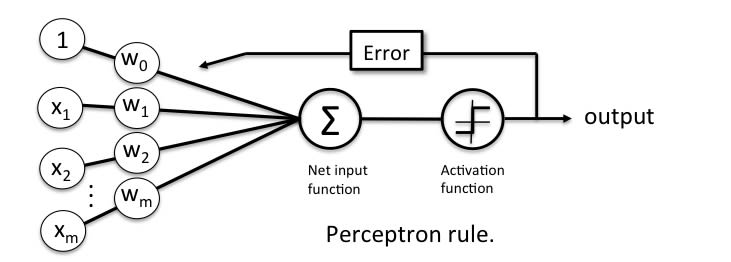

In [16]:
from PIL import Image
import requests
from io import BytesIO
response = requests.get('https://www.simplilearn.com/ice9/free_resources_article_thumb/symbolic-representation-of-perceptron-learning-rule.jpg')
img = Image.open(BytesIO(response.content))
img

### Na obrázku vyššie je Jedno Vrstvový Perceptron . Ja som použil  RELU ako aktivačnú funkciu a stochastický gradient ako optimalizačnú funkciu, ktorá nájde optimálne hodnoty váh.
### RELU možno ľahko považovať za jeden z mála medzníkov v revolúcii hlbokého učenia, napr. Techniky, ktoré teraz umožňujú rutinný rozvoj veľmi hlbokých neurónových sietí.
### Posilnenie: Perceptronový algoritmus je príkladom posilňovacieho učenia. Po každej prezentácii vstupno-výstupného príkladu vieme len to, či sieť produkuje očakávaný výstup alebo nie. Alternatívou by bolo učenie sa s opravou chýb, aktualizácie váh nie sú ovplyvnené len vstupom, ale aj veľkosťou chyby.
### Multilayer (Viacvrstvový prístup modelovania) - sieť pozostáva z viac ako jednej vrstvy výstupných uzlov, to znamená, že existuje aspoň jedna skrytá vrstva, ktorá odovzdáva vstupy do výstupnej vrstvy.
### Alternatíva k MLP: pravdepodobnostná neurónová sieť založená na bayesovskom prístupe. Podporuje inferenciu okrem odhadu parametrov.

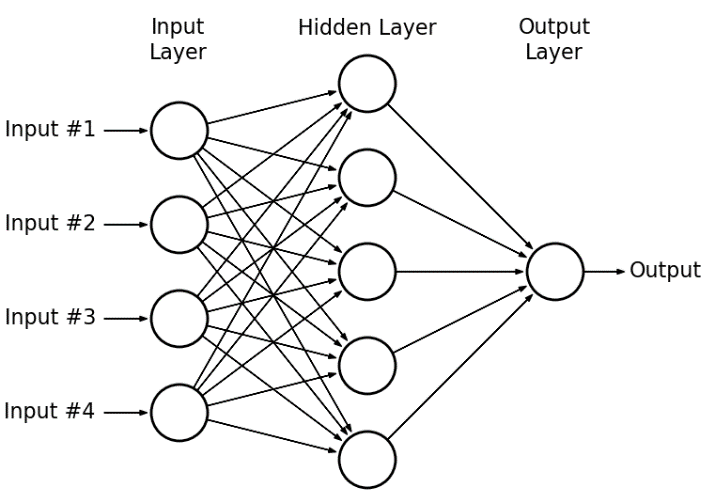

In [17]:
respons = requests.get('https://www.researchgate.net/profile/Mohamed_Zahran6/publication/303875065/figure/fig4/AS:371118507610123@1465492955561/A-hypothetical-example-of-Multilayer-Perceptron-Network.png')
img = Image.open(BytesIO(respons.content))
img

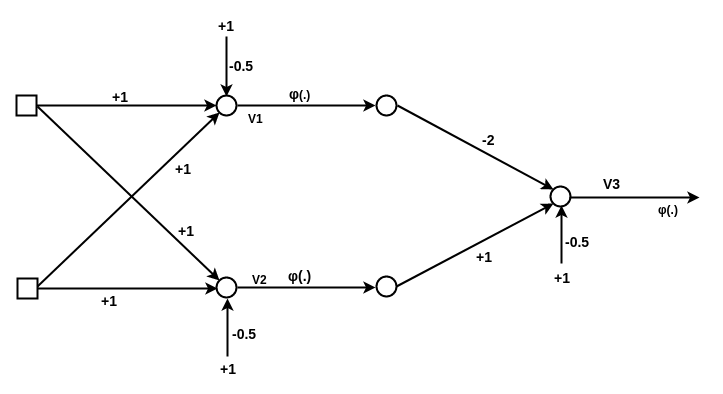

In [18]:
response = requests.get('https://miro.medium.com/max/1400/1*9dByklf9ybdvVtHq6RrOgw.png')
img2 = Image.open(BytesIO(response.content))
img2

### Feed Forward Network je najtypickejší model neurónovej siete. Jeho cieľom je priblížiť niektoré funkcie f (). Napríklad, klasifikátor y = f ∗ (x)ktorý mapuje vstup x na výstupnú triedu y, MLP nájde najlepšiu aproximáciu k tomuto klasifikátoru definovaním mapovania, y = f (x; θ) a naučením sa preň najlepších parametrov. Siete MLP sa skladajú z mnohých funkcií, ktoré sú spojené. Sieť s tromi funkciami alebo vrstvami by vytvorila f (x) = f (3) (f (2) (f (1) (x))). Každá z týchto vrstiev sa skladá z jednotiek, ktoré vykonávajú afinnú transformáciu lineárneho súčtu vstupov. Každá vrstva je reprezentovaná ako y = f (WxT + b). Ak f je aktivačná funkcia (uvedená nižšie), W je sada parametrov alebo váh vo vrstve, x je vstupný vektor, ktorý môže byť tiež výstupom predchádzajúcej vrstvy, a b je predpätý vektor. Vrstvy MLP pozostávajú z niekoľkých úplne spojených vrstiev, pretože každá jednotka vo vrstve je spojená so všetkými jednotkami v predchádzajúcej vrstve.

###  Na obrázku vyššie je zobrazený MultiLayer Perceptron (MLP) s jednou skrytou vrstvou. Každý neurón v skrytej vrstve transformuje hodnoty z predchádzajúcej vrstvy váženým lineárnym súčtom, po ktorom nasleduje nelineárna aktivačná funkcia. Výstupná vrstva prijíma hodnoty z poslednej skrytej vrstvy a transformuje ich na výstupné hodnoty.¶

# 5 MLP pre predikciu kategórií¶


In [19]:
# Import modelu MLP
from sklearn.neural_network import MLPClassifier
# Inicializovanie perceptrónu
mlp = MLPClassifier(hidden_layer_sizes =(100,),solver='adam',learning_rate_init= .01, max_iter=1000, alpha=1e-4,verbose=10, random_state=1)
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.57744739
Iteration 2, loss = 1.24193792
Iteration 3, loss = 0.98661717
Iteration 4, loss = 0.80543395
Iteration 5, loss = 0.68109292
Iteration 6, loss = 0.59268556
Iteration 7, loss = 0.52456592
Iteration 8, loss = 0.46840631
Iteration 9, loss = 0.42092955
Iteration 10, loss = 0.38124451
Iteration 11, loss = 0.35062843
Iteration 12, loss = 0.32712295
Iteration 13, loss = 0.30794431
Iteration 14, loss = 0.29005709
Iteration 15, loss = 0.27168076
Iteration 16, loss = 0.25297941
Iteration 17, loss = 0.23499311
Iteration 18, loss = 0.21848317
Iteration 19, loss = 0.20362539
Iteration 20, loss = 0.19011444
Iteration 21, loss = 0.17723911
Iteration 22, loss = 0.16472740
Iteration 23, loss = 0.15269213
Iteration 24, loss = 0.14148659
Iteration 25, loss = 0.13161286
Iteration 26, loss = 0.12304363
Iteration 27, loss = 0.11555283
Iteration 28, loss = 0.10889343
Iteration 29, loss = 0.10273170
Iteration 30, loss = 0.09694107
Iteration 31, loss = 0.09145842
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=10, warm_start=False)

### Počet uzlov vo vstupných a výstupných vrstvách môže byť určený rozmerom problému. Su dané 10 vstupné jednotky a 5 výstupné jednotky. Pridanie 100 uzlov v skrytej vrstve hidden_layer_sizes (100) má tendenciu pracovať lepšie, keď je prvá skrytá vrstva väčšia ako vstupná vrstva.
### Solver je nastavený na Stochastic Gradient Descent (SGD) - aktualizuje hodnoty váh, ktoré minimalizujú stratovú funkciu v kopách. SGD používa gradient stratovej funkcie.
### learning_rate_init = 0.01: Tento parameter riadi veľkosť kroku pri aktualizácii váh. Nieje dobre ked jeho hodnota je príliš veľká ale ani príliš malá.
### max_iter = 500: maximálny počet epoch (koľkokrát bude každý dátový bod použitý až do konvergencie riešiteľa).

# 6 Trénovanie modelu¶  

In [20]:
# Natrénovať model
mlp.fit(X_train, y_train)
# Výstupy
MLPClassifier (activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9, 
beta_2=0.999, early_stopping=False, epsilon=1e-08,       
hidden_layer_sizes=10, learning_rate='adaptive',      
learning_rate_init=0.01, max_iter=500, momentum=0.9,       
nesterovs_momentum=True, power_t=0.5, random_state=None,       
shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,       
verbose=False, warm_start=False)
predictions =mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

Iteration 1, loss = 1.57744739
Iteration 2, loss = 1.24193792
Iteration 3, loss = 0.98661717
Iteration 4, loss = 0.80543395
Iteration 5, loss = 0.68109292
Iteration 6, loss = 0.59268556
Iteration 7, loss = 0.52456592
Iteration 8, loss = 0.46840631
Iteration 9, loss = 0.42092955
Iteration 10, loss = 0.38124451
Iteration 11, loss = 0.35062843
Iteration 12, loss = 0.32712295
Iteration 13, loss = 0.30794431
Iteration 14, loss = 0.29005709
Iteration 15, loss = 0.27168076
Iteration 16, loss = 0.25297941
Iteration 17, loss = 0.23499311
Iteration 18, loss = 0.21848317
Iteration 19, loss = 0.20362539
Iteration 20, loss = 0.19011444
Iteration 21, loss = 0.17723911
Iteration 22, loss = 0.16472740
Iteration 23, loss = 0.15269213
Iteration 24, loss = 0.14148659
Iteration 25, loss = 0.13161286
Iteration 26, loss = 0.12304363
Iteration 27, loss = 0.11555283
Iteration 28, loss = 0.10889343
Iteration 29, loss = 0.10273170
Iteration 30, loss = 0.09694107
Iteration 31, loss = 0.09145842
Iteration 32, los

### Training = Minimalizácia nákladovej funkcie
### Gradient Descents = Nájdenie hodnoty váh, ktoré minimalizujú nákladovú funkciu.
### Klasifikátor viacerých tried, klasifikujte inštancie do jednej z troch alebo viacerých tried.
### Multinomiálne kategorické: Distribúcia cieľových údajov
### Relu: Jednotky v skrytej vrstve aplikujú aktivačnú funkciu na vyvolanie pocitu nelinearity v sieti. Relu nám hovorí, ako blízke sú tieto k 1 (1 = objavíme vzor, konkrétne kombináciu prvkov, ktorá vedie k tomuto výstupu). Bez aktivačnej funkcie by NN bola len lineárna regresná funkcia.
### Kategorická krížová entropia: Stratová funkcia (ako dobré sú parametre).
### Regularizácia L2: Regularizácia pomáha zabrániť nadmernému vybaveniu, tj dobre zovšeobecniť údaje, penalizovaním váh. L2 je súčet váh.
### Veľkosť skupiny = počet tréningových príkladov. Čím vyššia je veľkosť skupiny, tým viac pamäte budete potrebovať.

In [21]:
print("Test set score: %f" % mlp.score(X_test, y_test))


Test set score: 0.942857


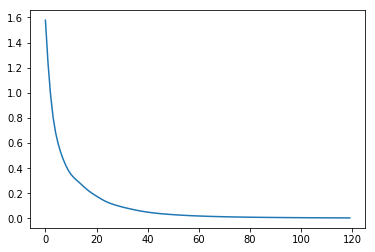

[1.5774473877227395, 1.2419379237988175, 0.9866171657393822, 0.8054339490882736, 0.6810929202706396, 0.5926855556424216, 0.5245659215329123, 0.4684063068977728, 0.4209295524703034, 0.3812445051911225, 0.3506284289922019, 0.32712294782287327, 0.3079443101892832, 0.29005709014000713, 0.27168076325935475, 0.2529794069538898, 0.23499311172069112, 0.21848317359138153, 0.20362539206110644, 0.1901144403031689, 0.1772391050881867, 0.16472740353782767, 0.15269212983124275, 0.14148659435549657, 0.1316128561813961, 0.12304363194404411, 0.11555283197905145, 0.10889342982033935, 0.10273170106983687, 0.09694106751304114, 0.0914584228215339, 0.0863681101569873, 0.08154337794549064, 0.07696287508784182, 0.07245627664878478, 0.06805807031697736, 0.0638348460343217, 0.05994217619021006, 0.056422411709246834, 0.05321342732728473, 0.05024140047489121, 0.04745801529639549, 0.044871406186465394, 0.042472760966958144, 0.040291502703577654, 0.038281756420374395, 0.03641125528063115, 0.03467670766632811, 0.033

In [22]:
# Zobrazíme graf chýb

errors = mlp.loss_curve_ 

plt.plot(errors)
plt.show()
print(errors)

# Solver, Vpráci som otestoval všetky tie to solveri :
## 'lbfgs' je optimalizátor v skupine kvázi Newtonových metód.

## 'sgd' označuje stochastické klesanie.

## „adam“ označuje stochastický optimalizátor založený na gradiente, ktorý navrhli Kingma, Diederik a Jimmy Ba
# Približná presnosť bola : lbfgs 94 - 97%,  sgd 80 - 94 %, adam 91 - 98%

# 